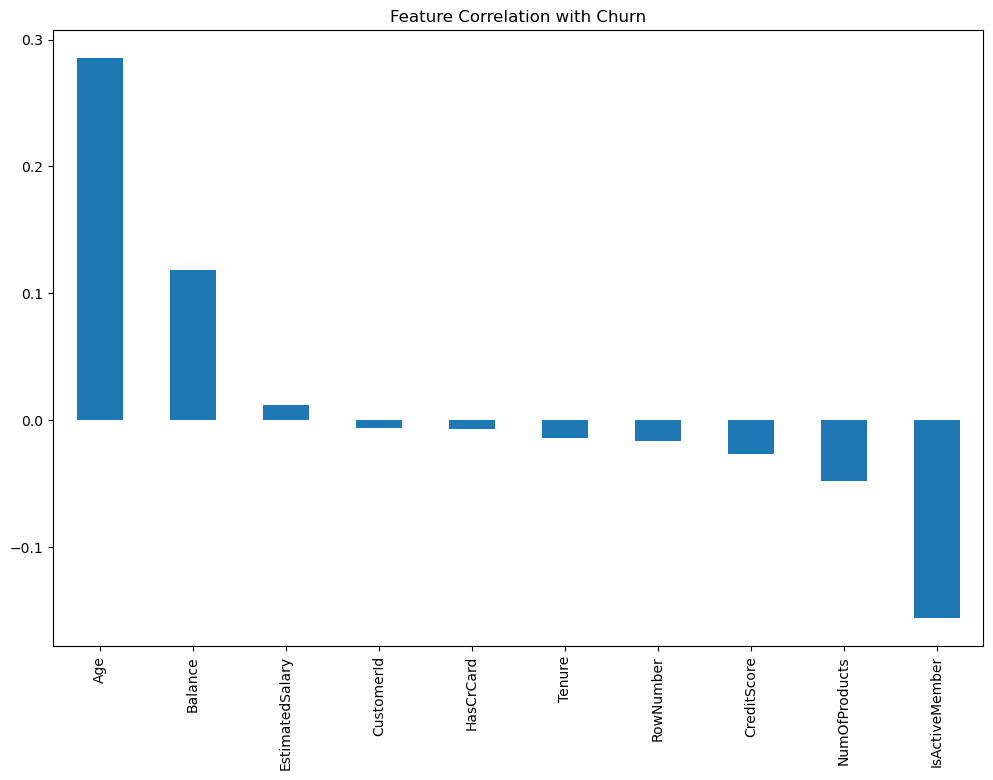

Epoch 1/100


C:\Users\Precious\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7851 - loss: 0.5069 - val_accuracy: 0.8356 - val_loss: 0.4058
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8346 - loss: 0.4028 - val_accuracy: 0.8450 - val_loss: 0.3771
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8490 - loss: 0.3736 - val_accuracy: 0.8556 - val_loss: 0.3604
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8563 - loss: 0.3538 - val_accuracy: 0.8575 - val_loss: 0.3517
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8653 - loss: 0.3321 - val_accuracy: 0.8544 - val_loss: 0.3482
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8671 - loss: 0.3319 - val_accuracy: 0.8550 - val_loss: 0.3475
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8594 - loss: 0.3409 - val_accuracy: 0.8600 - val_loss: 0.3419
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8653 - loss: 0.3268 - val_accuracy: 0.8587

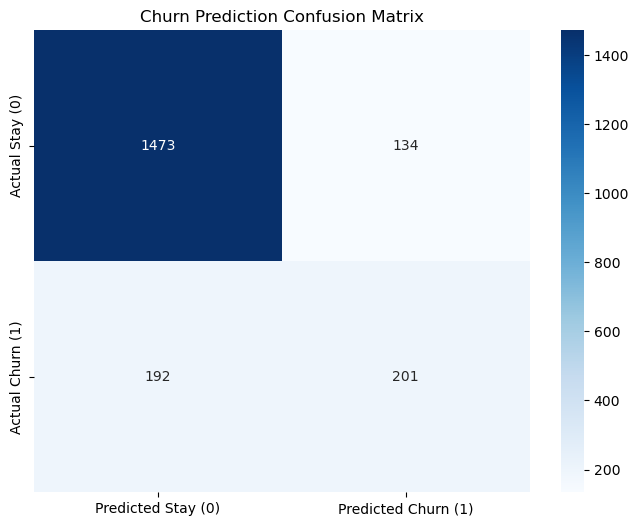

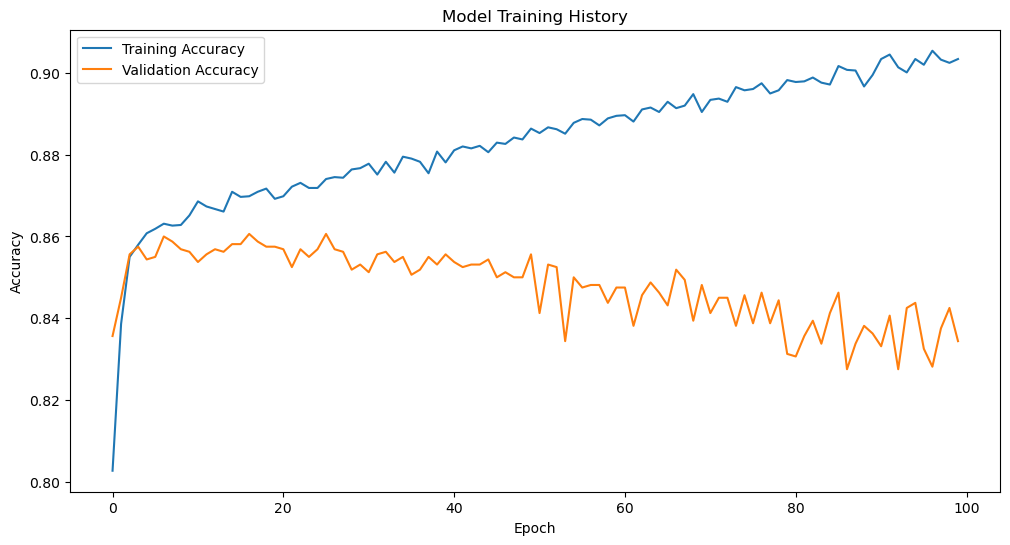

Final Test Accuracy: 0.8445
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      1607
           1       0.63      0.49      0.56       393

    accuracy                           0.84      2000
   macro avg       0.76      0.71      0.73      2000
weighted avg       0.83      0.84      0.84      2000



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report


# Load dataset
df = pd.read_csv('C:\\Users\\Precious\\Downloads\\Churn_Modelling.csv')

# Feature significance analysis using correlation matrix
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
plt.title('Feature Correlation with Churn')
(corr_matrix['Exited'].sort_values(ascending=False)[1:]
 .plot(kind='bar'))
plt.show()

# Data preprocessing
X = df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values

# Encode categorical data Geography and Gender columns
ct = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(drop='first'), [1, 2])
], remainder='passthrough')
X = ct.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Build ANN
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.2)

# Evaluate model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)


plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Stay (0)', 'Predicted Churn (1)'],
            yticklabels=['Actual Stay (0)', 'Actual Churn (1)'])
plt.title('Churn Prediction Confusion Matrix')
plt.show()

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Performance metrics
cm = confusion_matrix(y_test, y_pred)
print(f"Final Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))
